In [ ]:
from datasets import load_dataset, concatenate_datasets

# Load STS datasets
sts12 = load_dataset("mteb/sts12-sts")
sts13 = load_dataset("mteb/sts13-sts")
sts14 = load_dataset("mteb/sts14-sts")
sts15 = load_dataset("mteb/sts15-sts")
sts16 = load_dataset("mteb/sts16-sts")
stsb = load_dataset("mteb/stsbenchmark-sts")
sickr = load_dataset("mteb/sickr-sts")

In [59]:
# Combine datasets into one
sts12_train = sts12["train"]
sts12_test = sts12["test"]
sts13_test = sts13["test"]
sts14_test = sts14["test"]
sts15_test = sts15["test"]
sts16_test = sts16["test"]
stsb_train = stsb["train"]
stsb_validation = stsb["validation"]
stsb_test = stsb["test"]
sickr_test = sickr["test"]

dataset = concatenate_datasets([sts12_train, sts12_test, sts13_test, sts14_test, sts15_test, sts16_test, stsb_train, stsb_validation, stsb_test, sickr_test])

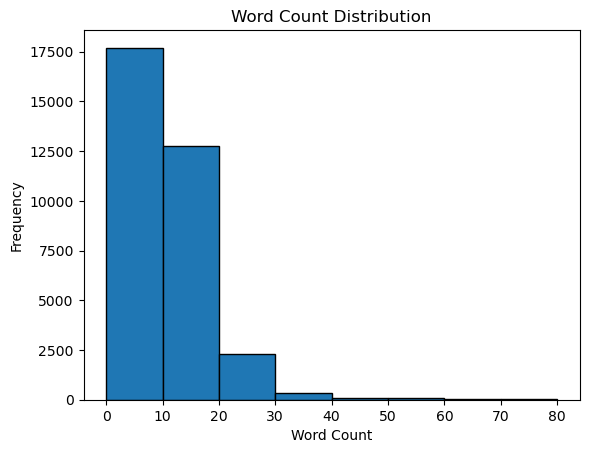

In [64]:
import matplotlib.pyplot as plt

# Plot word count distribution

word_count = []
for sample in dataset:
    word_count.append(len(sample["sentence1"].split()))

plt.hist(word_count, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution')
plt.show()

In [61]:
from sentence_transformers import InputExample

# Create buckets for different word counts and add samples to buckets

test_samples = {0:[], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8:[]}
for row in dataset:
  word_count = len(row["sentence1"].split())
  bucket = word_count // 10

  # Normalize scores to range 0 ... 1
  score = float(row['score']) / 5.0

  test_samples[bucket].append(InputExample(texts=[row['sentence1'], row['sentence2']], label=score))


In [62]:
for i in range(0, 9):
  print("Bucket", i, ":", len(test_samples[i]))

Bucket 0 : 17699
Bucket 1 : 12778
Bucket 2 : 2290
Bucket 3 : 335
Bucket 4 : 108
Bucket 5 : 67
Bucket 6 : 41
Bucket 7 : 14
Bucket 8 : 1


In [63]:
from  sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
from sentence_transformers import SentenceTransformer

test_evaluator = {}

for i in test_samples:
  if len(test_samples[i]) > 1:
    test_evaluator[i] = EmbeddingSimilarityEvaluator.from_input_examples(test_samples[i], name='sts-test-'+str(i))

model = SentenceTransformer('all-MiniLM-L6-v2')

for i in test_evaluator:
  test_evaluator[i](model, output_path="./result/")